In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import decartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
path = "Rat_Sightings.csv"
df = pd.read_csv(path, low_memory=False)

df = df[["Created Date", "Closed Date", "Location Type", "Incident Zip", "Incident Address", "City", "Borough", "Latitude", "Longitude", "Location"]]
df.sort_values(by=['Created Date'], inplace=True)
display(df)

df['Location Type'].unique()

df['Borough'].unique()




Created Date             Closed Date  \
159445  01/01/2010 02:15:27 PM                     NaN   
158127  01/01/2010 03:05:37 PM                     NaN   
158135  01/01/2010 04:14:27 PM                     NaN   
159229  01/01/2010 08:29:58 AM                     NaN   
54407   01/01/2010 08:52:19 PM                     NaN   
...                        ...                     ...   
192906  12/31/2021 12:18:57 PM  01/03/2022 12:36:00 PM   
192890  12/31/2021 12:24:21 PM  12/31/2021 12:24:21 PM   
192888  12/31/2021 12:27:19 PM  12/31/2021 12:27:19 PM   
192852  12/31/2021 12:33:27 AM  12/31/2021 12:33:27 AM   
192883  12/31/2021 12:56:21 PM  12/31/2021 12:56:21 PM   

                  Location Type  Incident Zip                Incident Address  \
159445          Vacant Building       11218.0         900 CONEY ISLAND AVENUE   
158127  3+ Family Apt. Building       11377.0                 31-14 58 STREET   
158135  3+ Family Apt. Building       10467.0            2504 BRONX PARK EAST   
159229  3+ Family Apt. Building       11206.0              202 PULASKI STREET   
54407     Other (Explain Below)       11201.0                             NaN   
...                         ...           ...                             ...   
192906      Commercial Building       10471.0  4685 MANHATTAN COLLEGE PARKWAY   
192890    Other (Explain Below)       11230.0                  2367 24 AVENUE   
192888      1-2 Family Dwelling       11221.0              411 MADISON STREET   
192852      Commercial Building       10028.0           1617 EAST   85 STREET   
192883      1-2 Family Dwelling       10465.0          3140 COUNTRY CLUB ROAD   

             City    Borough   Latitude  Longitude  \
159445   BROOKLYN   BROOKLYN  40.635654 -73.967757   
158127   WOODSIDE     QUEENS  40.756987 -73.903618   
158135      BRONX      BRONX  40.863614 -73.870441   
159229   BROOKLYN   BROOKLYN  40.692989 -73.943771   
54407    BROOKLYN   BROOKLYN  40.688903 -73.980929   
...           ...        ...        ...        ...   
192906      BRONX      BRONX  40.890878 -73.898321   
192890   BROOKLYN   BROOKLYN  40.614030 -73.973995   
192888   BROOKLYN   BROOKLYN  40.685695 -73.942154   
192852  MANHATTAN  MANHATTAN  40.775548 -73.948319   
192883      BRONX      BRONX  40.842424 -73.824004   

                                        Location  
159445   (40.63565426900362, -73.96775698011807)  
158127  (40.756986581184535, -73.90361811283164)  
158135    (40.8636140600279, -73.87044117516707)  
159229   (40.69298896011082, -73.94377050323628)  
54407    (40.68890317557533, -73.98092864957985)  
...                                          ...  
192906   (40.89087758142548, -73.89832066775104)  
192890   (40.61402964427997, -73.97399495034388)  
192888   (40.68569530343264, -73.94215409798927)  
192852    (40.77554780362181, -73.9483186773805)  
192883  (40.842423809444824, -73.82400410672514)  

[207121 rows x 10 columns]

array(['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND',
       'Unspecified', nan], dtype=object)

Text(0.5, 1.0, 'NYC Rat Incident Heatmap')

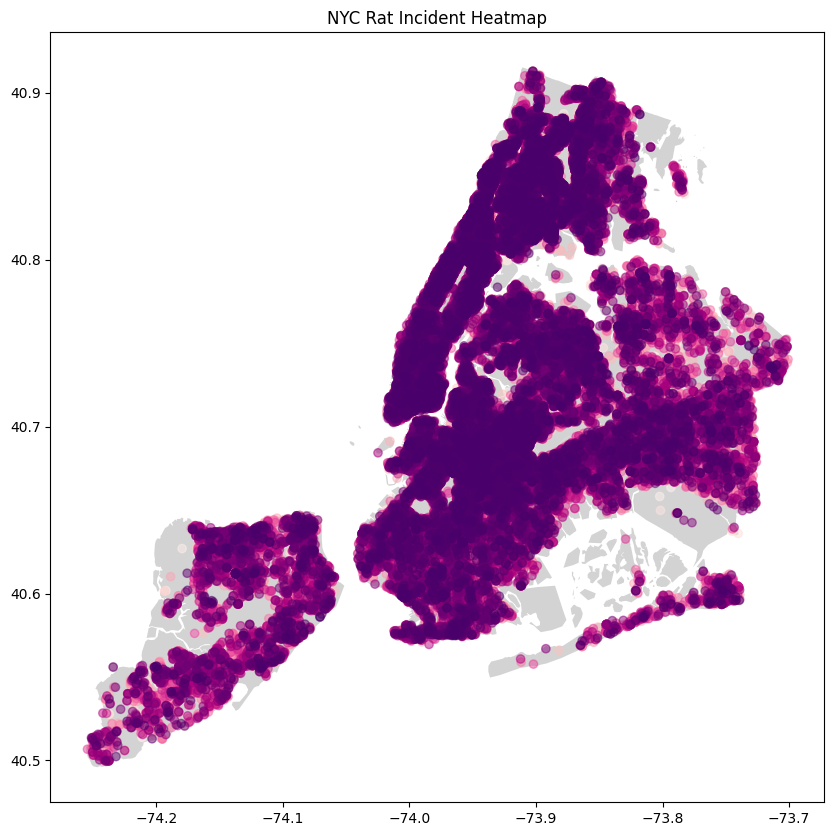

In [3]:
street_map = gpd.read_file("nyu_2451_34490")

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

ax.set_title('NYC Rat Incident Heatmap')

## Analyzing Frequency

In [ ]:
from datetime import datetime 

format = '%m/%d/%Y %H:%M:%S %p'
# Extracting the year and month from 'Created Date' & making their own columns
df['year'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).year)
df['month'] = df['Created Date'].apply(lambda x: datetime.strptime(x, format).month)

# The frequency array keeps track of frequency per year.
# We can use this later to make a scatter plot
frequency = []

# Each 'year' array contains:
    # index 0 ==> year_value (e.g 2011)
    # index 1 ==> array of rat sighting listings
    
# We can specify the number of columns and rows in plt.subplots to graph this in a grid format
fig, ax = plt.subplots(3, 4, figsize=(15, 15), sharex=True, sharey=True)

for year in df.groupby(['year']):
    year_freq = len(year[1])
    year_value = year[0]  
    
    # Adding the frequency for each year to an array
    frequency.append((len(year[1])))
    
    # geopandas stuff
    df_year = df[df['year'] == year[0]]
    geometry = [Point(xy) for xy in zip(df_year['Longitude'], df_year['Latitude'])]
    geo_df = gpd.GeoDataFrame(df_year, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)
    
    # Each heatmap will be plotted within a section of the grid
    # Below are the x & y values for each map
    
    # The initial values are for 2011 -> (0, 0)
    x = 0
    y = 0
    
    if year[0] == 2012:
        x = 0
        y = 1
    elif year[0] == 2013:
        x = 0
        y = 2
    elif year[0] == 2014:
        x = 0
        y = 3
    elif year[0] == 2015:
        x = 1
        y = 0
    elif year[0] == 2016:
        x = 1
        y = 1
    elif year[0] == 2017:
        x = 1
        y = 2
    elif year[0] == 2018:
        x = 1
        y = 3
    elif year[0] == 2019:
        x = 2
        y = 0
    elif year[0] == 2020:
        x = 2
        y = 1
    elif year[0] == 2021:
        x = 2
        y = 2
    elif year[0] == 2022:
        x = 2
        y = 3
    
    # Placing the map of NYC under this 
    street_map.to_crs(epsg=4326).plot(ax=ax[x,y], color='lightgrey')
    geo_df.plot(ax=ax[x,y], cmap = 'RdPu', alpha = .5)
    
    ax[x,y].set_title(str(year[0]) + ' NYC Rat Incident Heatmap')


In [ ]:
years = df.year.unique()
# This dataframe contains 12 rows & two columns representing # of rat sightings per year (frequency)
year_freq_df = pd.DataFrame({'years': years, 'frequency': frequency})

# Plotting the graph
graph = year_freq_df.plot.scatter('years', 'frequency') 
 
# Creating the title, limits, and labels 
graph.set_title('NYC Rat Sighting Frequency Over Time') 
graph.set_xlabel("Year")  
graph.set_ylabel("Frequency")  
 
plt.xlim(2010, 2022) 
plt.ylim(10000, 26000) 
plt.show() 

## Analyzing Boroughs

In [ ]:
# NYC is one of the largest cities in the world. For administrative purposes, the city was
# split into five boroughs in 1898: the Bronx, Brooklyn, Manhattan, Queens, and Staten Island.

# Which borough has the highest number of rat sightings?
# We can easily determine this by graphing a scatter plot of frequency per borough.

In [ ]:
# The frequency array keeps track of frequency per year.
# We can use this later to make a scatter plot
b_frequency = []
boroughs = []

for borough in df.groupby(['Borough']):  
    if borough[0] != 'Unspecified':
        # Adding the frequency for each borough to an array
        borough_freq = len(borough[1])
        b_frequency.append(borough_freq)
        boroughs.append(borough[0])

borough_freq_df = pd.DataFrame({'boroughs': boroughs, 'frequency': b_frequency})   
borough_freq_df

# Plotting the graph
graph = borough_freq_df.plot.scatter('boroughs', 'frequency') 
 
# Creating the title, limits, and labels 
graph.set_title('NYC Rat Sighting Frequency for Each Borough') 
graph.set_xlabel("Borough")  
graph.set_ylabel("Frequency")  

plt.show() 

borough_freq_df

In [ ]:
# Brooklyn has the highest rat sighting frequency, however it is one of the larger boroughs in NYC so that's 
# somewhat expected. 

# When comparing the number of rat sightings for each borough, we must also take the bourough's size into 
# consideration. How can we measure frequency while also incorporating a bourough's square mileage?

# NYC Square Mileage Per Borough
# Bronx:         42.1
# Brooklyn:      70.82
# Manhattan:     22.83
# Queens:        108.53
# Staten Island: 58.37

In [ ]:
sq_mile_info = [42.1, 70.82, 22.83, 108.53, 58.37]

borough_freq_df['sq_mile'] = sq_mile_info
borough_freq_df['density'] = borough_freq_df['frequency'] / borough_freq_df['sq_mile']

# Plotting the graph
graph = borough_freq_df.plot.scatter('boroughs', 'density') 
 
# Creating the title, limits, and labels 
graph.set_title('NYC Rat Sighting Density for Each Borough') 
graph.set_xlabel("Borough")  
graph.set_ylabel("Density")  

plt.show() 

## Location of Rat Sightings
Now that we have taken a look at the overall frequency and location of these sightings, lets take a closer look at the specific types of places where these rats are being spotted. To do this, we have to combine and condense certain location entries to make our data useable. 

In [14]:
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['3+ Family Apt. Building','3+ Family Apartment Building','Apartment','3+ Family Apt.', '3+Family Apt.', '3+ Family Apt'], 'Apartment Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-3 Family Mixed Use Building', '1-2 Family Mixed Use Building', '3+ Family Mixed Use Building'], 'Mixed Use Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['1-2 FamilyDwelling', '1-3 Family Dwelling', '1-2 Family Dwelling'], 'Family Dwelling'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Restaurant/Bar/Deli/Bakery', 'Store', 'Commercial Building', 'Catering Service', 'Retail Store', 'Restaurant', 'Grocery Store'], 'Commercial Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Abandoned Building', 'Vacant Building', 'Vacant Lot'], 'Vacant Lot/Property'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Street Fair Vendor', 'Ground', 'Street Area'], 'Street'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Summer Camp', 'Cafeteria - Public School', 'School/Pre-School'], 'School'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Residential Property','Residence','Private House','Single Room Occupancy (SRO)','Mixed Use Building', 'Family Dwelling', 'Apartment Building'], 'Residential Building'))
df['Location Type'] = df['Location Type'].replace(dict.fromkeys(['Other (Explain Below)'], 'Other'))

df['Location Type'].value_counts()

Residential Building          143656
Other                          31502
Commercial Property            11029
Vacant Lot/Property             9092
Construction Site               4714
Parking Lot/Garage              2132
Catch Basin/Sewer               2068
Public Garden                    901
Government Building              464
Street                           442
School                           361
Day Care/Nursery                 219
Office Building                  193
Public Stairs                    178
Hospital                         133
Building (Non-Residential)        23
Beach                              2
Name: Location Type, dtype: int64

There were several entries spelled differently, and many that we could combine into larger categories (e.g. Abandoned Building, Vacant Building, Vacant Lot into Vacant Lot/Property). Now that we have a smaller number of unique entries to work with, we can take a look at the most common locations.

Text(0, 0.5, 'Number of Sightings')

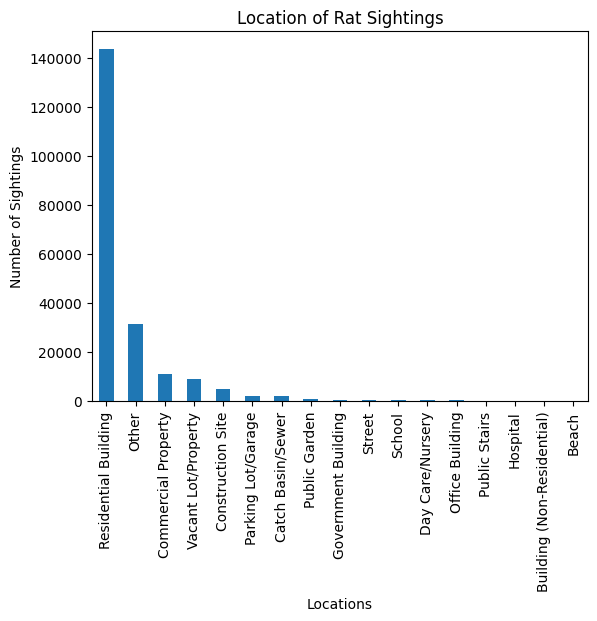

In [15]:
#Location of sightings
ax = df['Location Type'].value_counts().plot(kind='bar', title='Location of Rat Sightings')
ax.set_xlabel("Locations")
ax.set_ylabel("Number of Sightings")

[TODO]We can see from the cumulative graph that Residential buildings are by far the most common location to see rats.

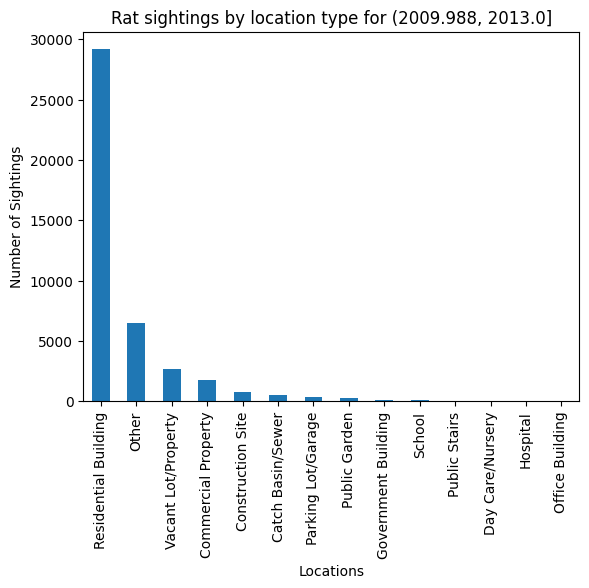

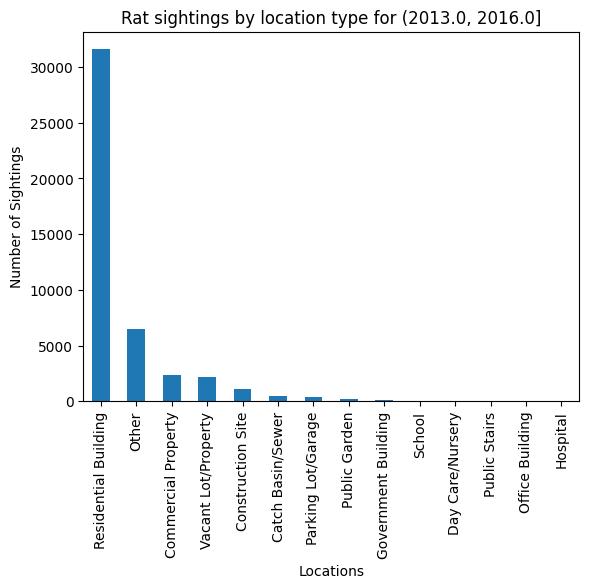

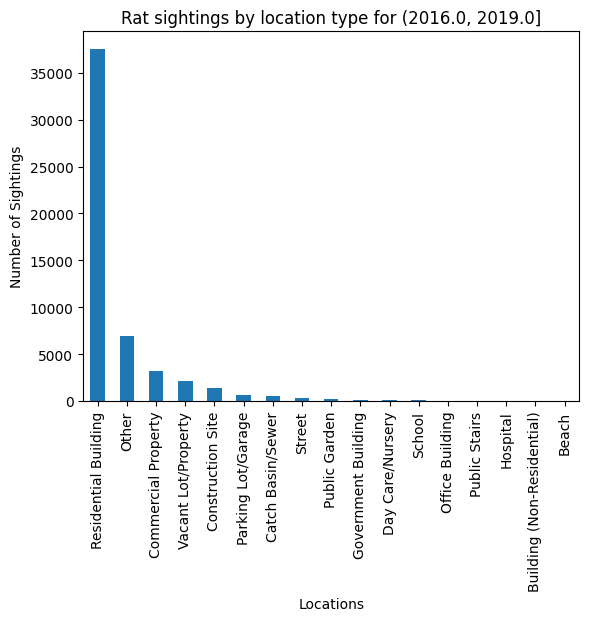

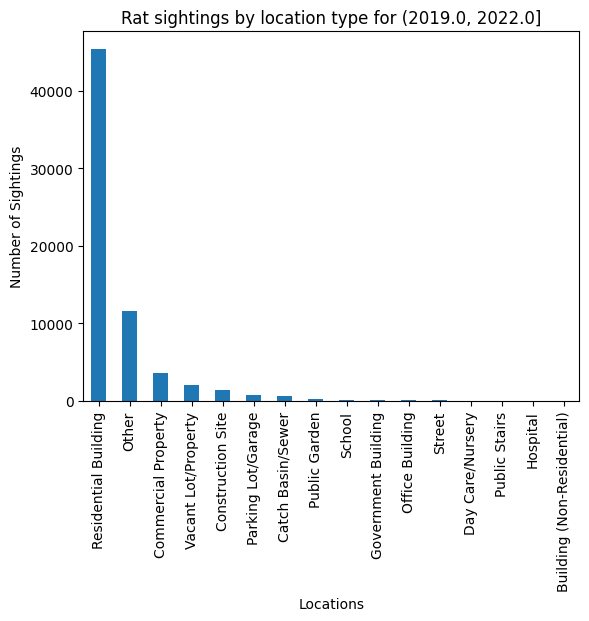

In [9]:
df['Time Group'] = pd.cut(df['year'], 4)
df['Time Group'].unique()

for years, group in df.groupby('Time Group'):
    ax = group['Location Type'].value_counts().plot(kind='bar')
    ax.set_xlabel("Locations")
    ax.set_ylabel("Number of Sightings")
    ax.set_title('Rat sightings by location type for ' + str(years))
    plt.show()

## Time of Year
We have seen how rat sightings have been changing from 2010 to 2022, but we have not yet explored how the sightings are distributed throughout the year. Below, we will graph the sighting counts for each month of the year to see if there are certain months or seasons in which sightings are more common.

7     23082
8     22672
6     22316
5     21285
9     20273
10    18993
4     17016
3     14911
11    13222
1     11612
2     11485
12    10254
Name: month, dtype: int64

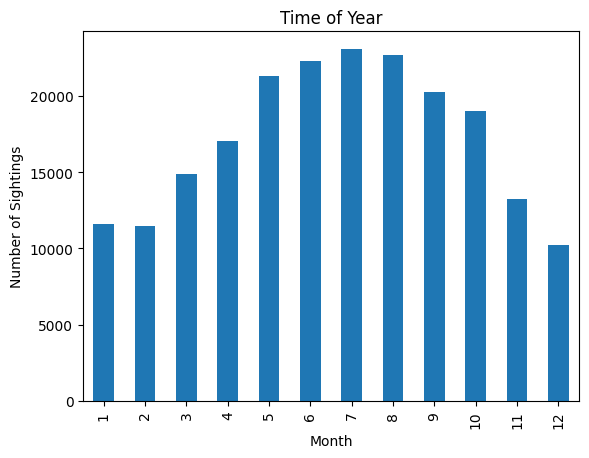

In [10]:
ax = df['month'].value_counts().sort_index().plot(kind='bar', title='Time of Year')
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sightings")
df['month'].value_counts()


As we can see from the above bar graph, rat sightings are the lowest in colder months and highest in the warmer, summer months. 